**Задача 7**. *Критерий согласия для проверки простой непараметрической гипотезы*

Постройте с помощью стохастического эксперимента на основе указанной метрики приближенный критерий для проверки основной гипотезы. Найдите критические значения $D_{кр}$ для трех уровней значимости $\alpha=0.1,0.05$ и $0.01$.
Протестируйте критерий на двух-трех примерах и сформулируйте выводы.

Вариант 28:
- Основная гипотеза: $A=0$ - выборка получена из распределения $R[0,1]$
- Метрика: $D=3$ - $D(n,l)=\frac{1}{n}\sqrt{\sum\limits_{j}^l(\nu_j-np_j)^2}$
- Объем выборки: $100$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import log2, trunc

In [2]:
n = 100
m = 25000 # выбрана самостоятельно

def D_stat(n, l, hyst):
    stat = 0
    pj = 1 / l
    for j in range(0, l):
        stat += (hyst[j] - n*pj)**2
    return np.sqrt(stat) / n

Идея эксперимента состоит в следующем: сгенерируем m раз равномерную выборку и для каждой выборки применим заданную метрику. Получим статистику D, у которой можно вычислить квантили указанных выше уровней. После всех этих действий получим критерий, способный, для данного варианта, дигностировать равномерную выборку

In [3]:
Dmas = []
for k in range(m):
    # генерирую случайную выборку из R[0, 1] размера n
    X = np.random.uniform(0, 1, n)
    
    # определяю количество интервалов
    l = 1 + trunc(log2(X.shape[0]))
    
    # создаю гистограмму
    x = np.linspace(X.min(), X.max(), l + 1)
    hist = np.histogram(X, bins=x)
    
    # определяю Dk статистику
    Dmas.append(D_stat(n, l, hist[0]))

Произведу первоначальную предобработку данных

In [4]:
D = np.array(Dmas)
l = 1 + trunc(log2(D.shape[0]))
h = (D.max() - D.min()) / l

print('Минимальный элемент:', round(D.min(), 3))
print('Максимальный элемент:', round(D.max(), 3))
print('Размах:', round(D.max() - D.min(), 3))
print('Количество интервалов (l):', l)
print('Длина интервала (h):', round(h, 4))

Минимальный элемент: 0.012
Максимальный элемент: 0.209
Размах: 0.197
Количество интервалов (l): 15
Длина интервала (h): 0.0131


In [5]:
x = np.linspace(D.min(), D.max(), l + 1)
hist = np.histogram(D, bins=x)

print('Массив эмпирических частот:\n', hist[0])
p = hist[0] / D.shape[0]
print('Массив относительных частот:\n', p.round(3))
f1 = p / h
print('Высоты столбцов гистограммы:\n', [round(i, 3) for i in f1])
print('Интервалы столбцов гистограммы:\n', hist[1].round(3))

Массив эмпирических частот:
 [  47  288 1237 2873 4278 4947 4658 3109 2048  926  377  144   51   13
    4]
Массив относительных частот:
 [0.002 0.012 0.049 0.115 0.171 0.198 0.186 0.124 0.082 0.037 0.015 0.006
 0.002 0.001 0.   ]
Высоты столбцов гистограммы:
 [0.143, 0.876, 3.764, 8.742, 13.017, 15.052, 14.173, 9.46, 6.231, 2.818, 1.147, 0.438, 0.155, 0.04, 0.012]
Интервалы столбцов гистограммы:
 [0.012 0.025 0.038 0.051 0.065 0.078 0.091 0.104 0.117 0.13  0.143 0.157
 0.17  0.183 0.196 0.209]


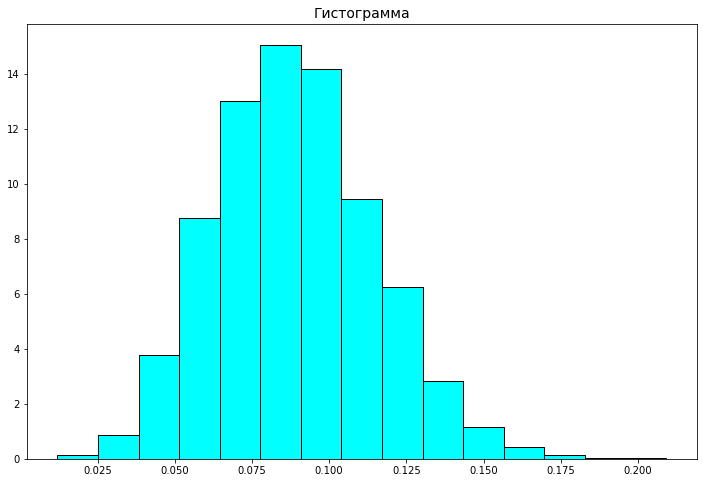

In [13]:
fig, ax = plt.subplots()
    
# строю гистограмму
ax.bar(hist[1][:-1], f1, width=h, color='cyan', edgecolor='black', align='edge')

ax.set_title('Гистограмма', fontsize=14)

fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

Найду выборочные квантили. Для этого необходимо отсортировать полученную статистику D и взять его квантили уровней $\alpha=0.1,0.05$ и $0.01$

In [7]:
def get_quantile(D, alpha):
    return round(np.sort(D)[int(np.ceil((1-alpha) * D.shape[0]))], 3)

alphas = [0.1, 0.05, 0.01]
print('Эмпирические квантили:')
for alpha in alphas:
    print('уровня {}: {}'.format(1 - alpha, get_quantile(D, alpha)))

Эмпирические квантили:
уровня 0.9: 0.123
уровня 0.95: 0.133
уровня 0.99: 0.155


Выведу окрестности квантилей уровней 0.9, 0.95, 0.99

In [8]:
for alpha in alphas:
    print('уровень доверия {}:\nD[{}]={}\nD[{}]={}\nD[{}]={}\n'.
          format(
              1 - alpha, 
              int(np.ceil((1-alpha) * D.shape[0])) - 1, round(np.sort(D)[int(np.ceil((1-alpha) * D.shape[0])) - 1], 3),
              int(np.ceil((1-alpha) * D.shape[0])), round(np.sort(D)[int(np.ceil((1-alpha) * D.shape[0])) - 1], 3),
              int(np.ceil((1-alpha) * D.shape[0])) + 1, round(np.sort(D)[int(np.ceil((1-alpha) * D.shape[0])) + 1], 3)
          ))

уровень доверия 0.9:
D[22499]=0.123
D[22500]=0.123
D[22501]=0.123

уровень доверия 0.95:
D[23749]=0.133
D[23750]=0.133
D[23751]=0.133

уровень доверия 0.99:
D[24749]=0.155
D[24750]=0.155
D[24751]=0.155



по сортированной выборке получил, что при m=25000 экспериментах квантили перестали меняться

In [9]:
# ФУНКЦИЯ ДЛЯ ТЕСТИРОВАНИЯ ПОСТРОЕННОГО КРИТЕРИЯ
def getDstat(X):
    # определяю количество интервалов
    l = 1 + trunc(log2(X.shape[0]))
    
    # определяю ширину интервалов
    h = (X.max() - X.min()) / l

    # создаю гистограмму
    x = np.linspace(X.min(), X.max(), l + 1)
    hist = np.histogram(X, bins=x)

    return round(D_stat(n, l, hist[0]), 3)

Проверю свою гипотезу $A=0$ - выборка получена из распределения $R[0,1]$

In [10]:
X = np.random.uniform(0, 1, n)
print('Результат применения критерия:', getDstat(X))

Результат применения критерия: 0.077


0.077 < квантилей заданных уровней. Таким образом гипотеза принимается

Тестирование критерия

1) Выборка получена из корня равномерного распределения

In [11]:
X = np.sqrt(np.random.uniform(0, 1, n))
print('Результат применения критерия:', getDstat(X))

Результат применения критерия: 0.197


0.197 > квантилей заданных уровней. Таким образом гипотеза отвергается

2) Выборка получена из бета-распределния с параметрами 2, 5

In [12]:
X = np.random.beta(2, 5, n)
print('Результат применения критерия:', getDstat(X))

Результат применения критерия: 0.263


0.263 > квантилей заданных уровней. Таким образом гипотеза отвергается

**Вывод**: в результате данной работы успешно построен критерий, определяющий получена ли выборка из равномерного распределения. Проведено 3 теста, подтвердившие построенный критерий